


#Determine the type of failure to reduce machine downtime and ensure the reliability of correct maintenance.

#DATA UNDERSTANDING


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Uploading Dataframe as df

In [ ]:
df=pd.read_csv("/content/predictive_maintenance.csv")

Checking the size of the Dataset

In [ ]:
df.shape

(10000, 10)

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df.isna().sum().sum()

0

There aren't any null values present in any of the columns.

In [ ]:
df.duplicated().sum()

0

There aren't any duplicates present in any of the columns

In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


Rotational speed [rpm]: The maximum value (2886 rpm) is significantly higher than the 75th percentile (1612 rpm), indicating potential outliers.

Torque [Nm]: The maximum value (76.6 Nm) is more than three standard deviations away from the mean (39.99 Nm), suggesting potential outliers.

Tool wear [min]: The range of values (0 to 253 min) with a mean of 107.95 min and a high standard deviation suggests potential outliers, particularly the maximum value.

In [ ]:
df.Target.value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

There are two Targets

Target : Failure or Not

Failure Type : Type of Failure

There are unbalanced classes in the columns, maximum proportion of data is classified without failure.

In [ ]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


The dataset is highly imbalanced, as majority of the data is labeled as "No Failure." This can lead to a model biased towards the majority class, achieving high accuracy but failing to identify minority failure classes.

As a result, accuracy is misleading.







#DATA PREPERATION

In [ ]:
rename_columns = {
    'UDI':'ID',
    'Air temperature [K]': 'Air_temperature',
    'Process temperature [K]' : 'Process_temperature',
    'Rotational speed [rpm]' : 'Rotational_speed',
    'Torque [Nm]' : 'Torque',
    'Tool wear [min]' : 'Tool_wear',
    'Product ID' : 'Product_ID',
    'Failure Type': 'Failure_type'
}
df.rename(rename_columns, axis = 1, inplace = True)

In [ ]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [ ]:
#renaming the classes
rename_type = {
    'L':'Low',
    'M':'Medium',
    'H':'High'
}
df['Type'].replace(rename_type, inplace = True)



In [ ]:
# Analysing redundance value, count failures on "Target" column
count_failures = (df['Target'] == 1).sum()
print('Number of failures:', count_failures)
# Sum of occurrences of 'Failure_type' other than 'No Failure'
sum_failures = df.loc[(df['Failure_type'] != 'No Failure') & (df['Target'] == 1), 'Failure_type'].count()
print('Sum of failures different of "No Failure":', sum_failures)

Number of failures: 339
Sum of failures different of "No Failure": 330


In [ ]:
# Filter the rows with has 1 in the column "Target" and 'No Failure' in the column 'Failure_type'
rows_to_remove = df[(df['Target'] == 1) & (df['Failure_type'] == 'No Failure')]
# Remove this filtered row in the main df
df.drop(rows_to_remove.index, inplace=True)

In [ ]:
df = df.loc[df['Failure_type'] != 'Random Failures']
df['Failure_type'].value_counts()

Failure_type
No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: count, dtype: int64

 'Random Failures' might introduce noise into the model, which could affect its performance or accuracy. Removing them could lead to a more accurate model.



In [ ]:
#removing unwanted columns

df.drop(columns=['Product_ID','ID','Target'],axis = 1, inplace = True)

#FEATURE UNDERSTANDING


Text(0, 0.5, 'Count')

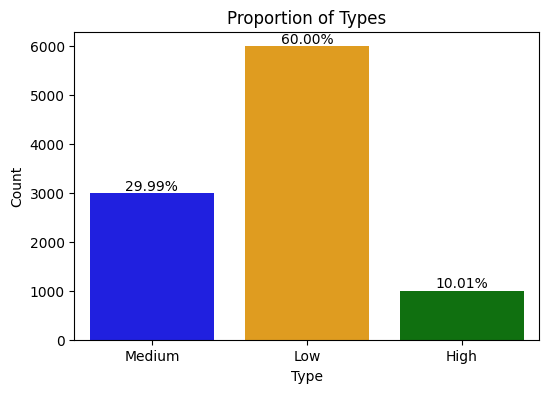

In [ ]:
#Types
plt.figure(figsize=(6, 4))

palette = {'Medium': 'blue', 'Low': 'orange', 'High': 'green'}

ax = sns.countplot(data=df, x='Type', palette=palette, hue='Type', dodge=False, legend=False)

total=len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.title('Proportion of Types')
plt.xlabel('Type')
plt.ylabel('Count')


 This visualization underscores that Low is the predominant class, while High is the least represented.

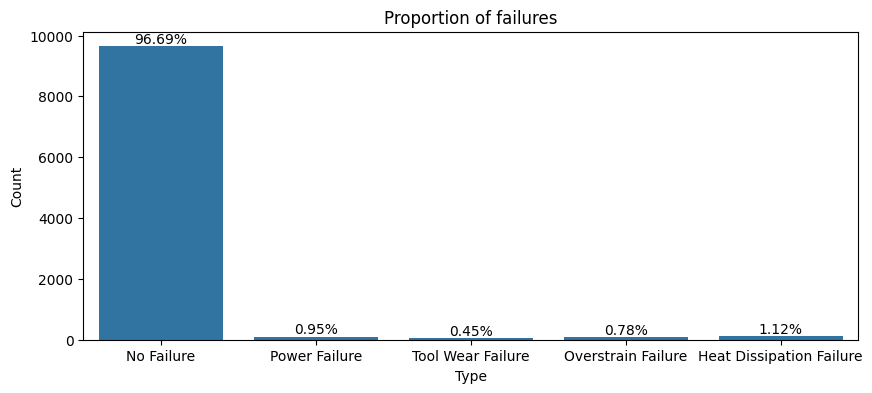

In [ ]:
#proportion of failures
plt.figure(figsize=(10 ,4))
ax = sns.countplot(data = df, x='Failure_type')
plt.title('Proportion of failures')
plt.xlabel('Type')
plt.ylabel('Count')


total=len(df['Failure_type'])
for p in ax.patches:
  height=p.get_height()
  percentage=(height / total) *100
  ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.show()


There is a significant imbalance in the data, with the "No Failure" category accounting for 96.69% of the total.

This high proportion of non-failure instances indicates that the dataset is heavily skewed towards no failures, making the remaining categories—Power Failure, Tool Wear Failure, Overstrain Failure, and Heat Dissipation Failure—underrepresented.

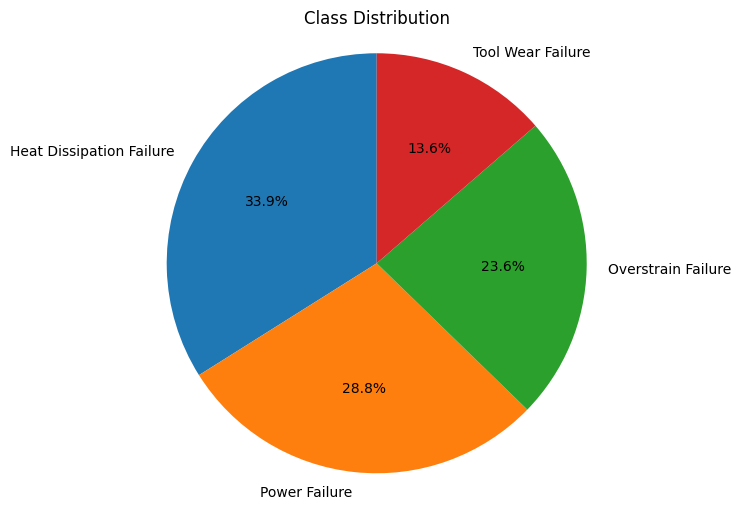

In [ ]:
df_failure_type = df.loc[df['Failure_type'] != "No Failure"]

prop = df_failure_type['Failure_type'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
plt.pie(prop, labels=prop.index, autopct='%1.1f%%', startangle=90,)
plt.axis('equal')
plt.title('Class Distribution')
plt.show()

In [ ]:
df.columns

Index(['Type', 'Air_temperature', 'Process_temperature', 'Rotational_speed',
       'Torque', 'Tool_wear', 'Failure_type'],
      dtype='object')

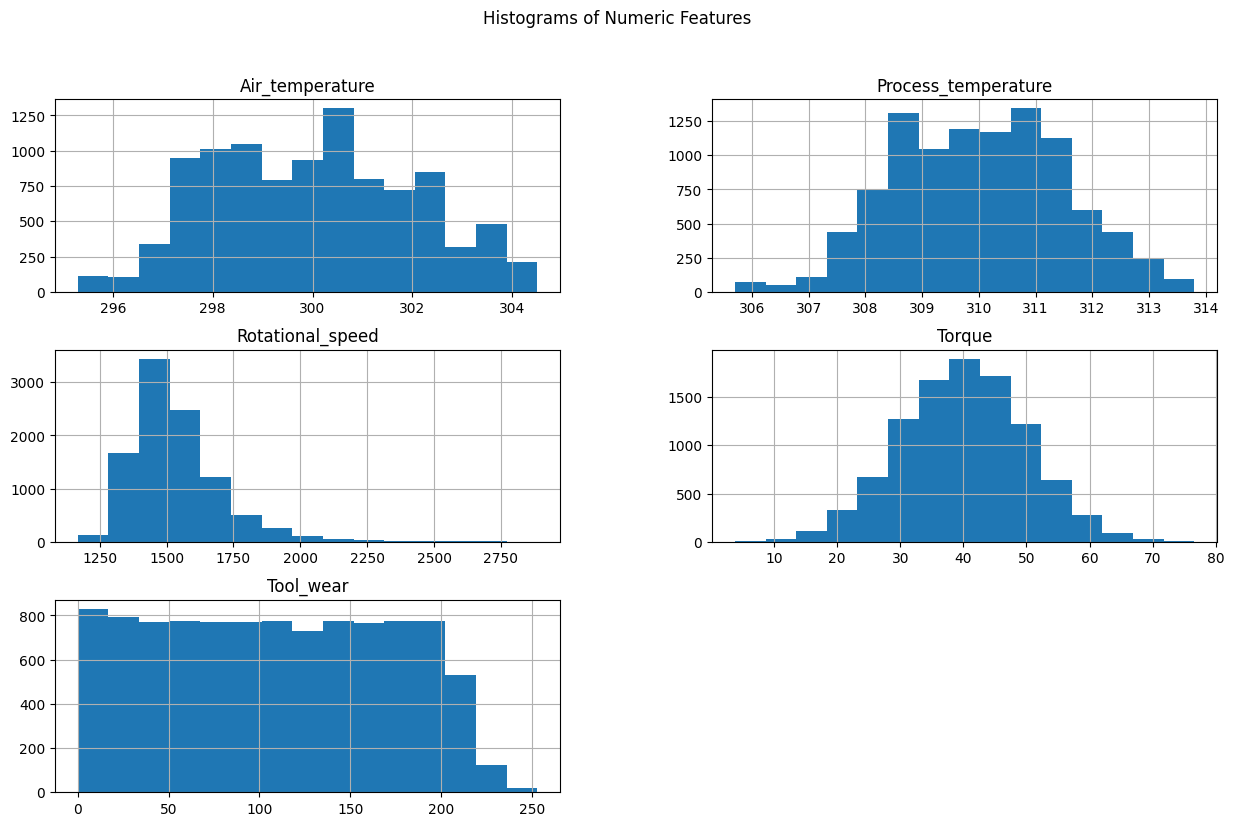

In [ ]:
NUMERIC_FEATURES = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']
CATEGORIC_FEATURES = ['Type']

df[NUMERIC_FEATURES].hist(bins=15, figsize=(15, 9), layout=(3, 2))
plt.suptitle('Histograms of Numeric Features')
plt.show()



Air Temperature [K]: Ranges from 295K to 305K, peaking around 300K.

Process Temperature [K]: Ranges from 306K to 314K, with a normal distribution around 310K.

Rotational Speed [rpm]: Ranges from 1250 to 2750 rpm, mostly around 1500 rpm with a right skew.

Torque [Nm]: Ranges from 0 to 80 Nm, peaking around 40 Nm with a normal distribution.

Tool Wear [min]: Ranges from 0 to 250 minutes, fairly evenly distributed but slightly decreasing as tool wear increases.

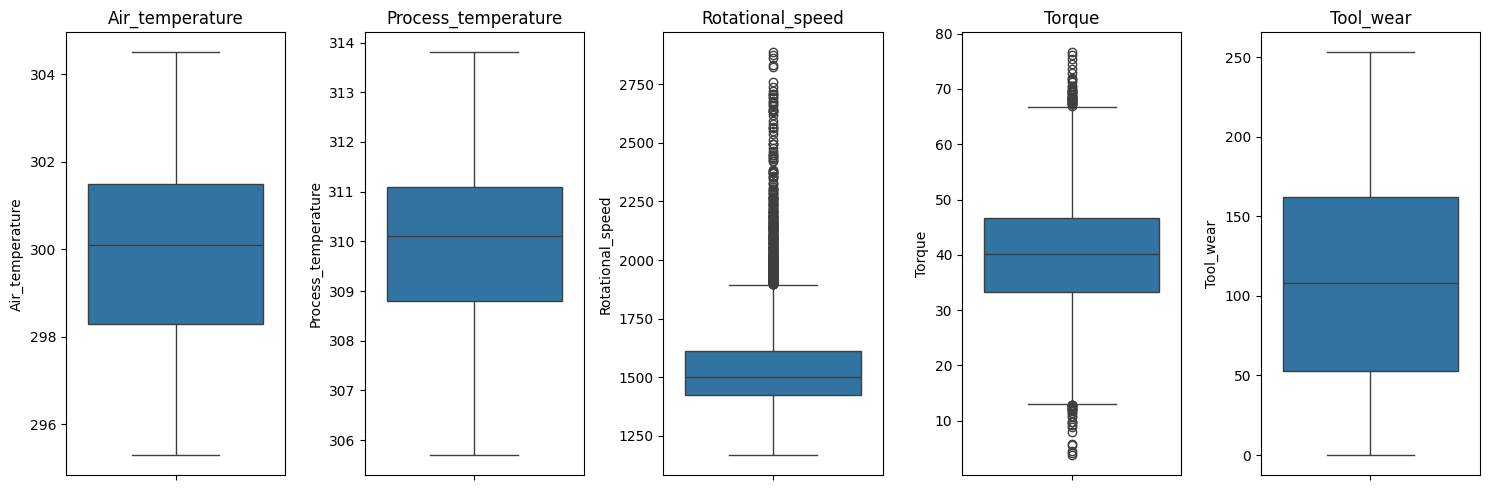

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(NUMERIC_FEATURES), figsize=(15, 5))


for i, feature in enumerate(NUMERIC_FEATURES):
    sns.boxplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(f'{feature}')


plt.tight_layout()


plt.show()

There are several outliers in Roatation speed and torque.

 Outliers can indicate anomalies or rare events that may be early indicators of potential failures.

 outliers may represent critical machine conditions that need immediate attention to prevent breakdowns or malfunctions.

 so in this case we don't need to treat outliers.

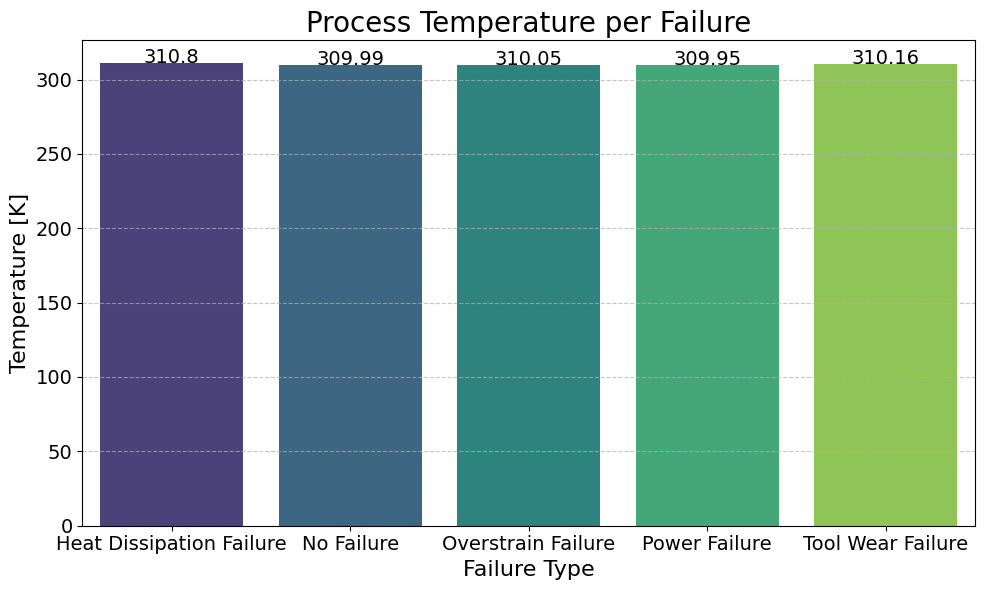

In [ ]:
# Grouping by 'Failure Type' and calculating the mean values

summary= df.groupby('Failure_type').agg({
    'Air_temperature': 'mean',
    'Process_temperature': 'mean',
    'Torque': 'mean',
    'Tool_wear': 'min',
    'Rotational_speed': 'mean'
}).reset_index()


summary.columns = ['failure_type','Air_temperature_avg', 'process_temp_avg', 'torque_avg', 'tool_wear_min_avg','Rotational speed [rpm]']

# Creating the bar plot for process temperature average per failure

plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='failure_type', y='process_temp_avg', palette='viridis')


for index, row in summary.iterrows():
    plt.text(index, row['process_temp_avg'], round(row['process_temp_avg'], 2), color='black', ha="center", size=14)


plt.title('Process Temperature per Failure', fontsize=20, ha='center')
plt.ylabel('Temperature [K]', fontsize=16)
plt.xlabel('Failure Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


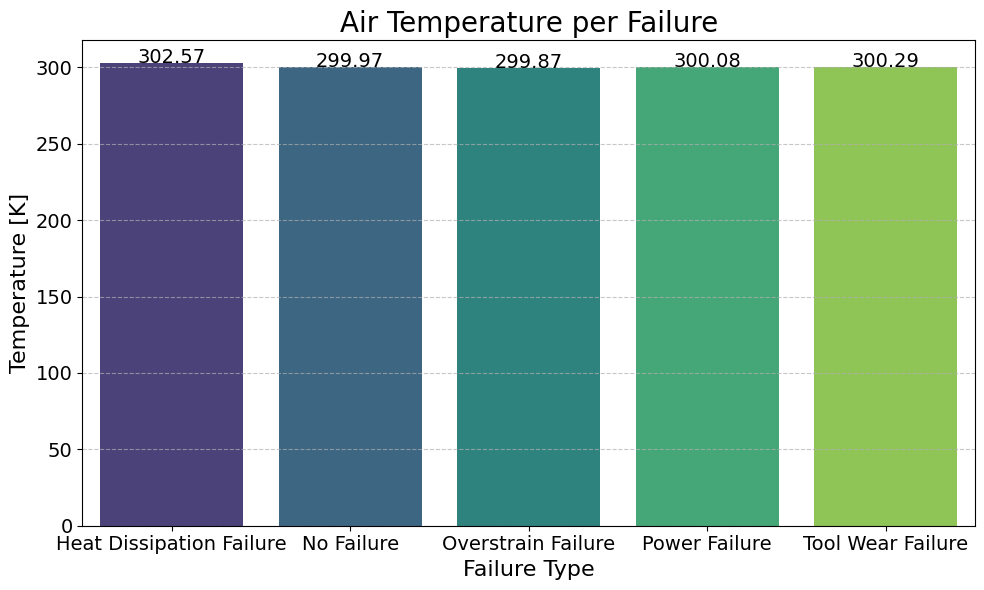

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='failure_type', y='Air_temperature_avg', palette='viridis')


for index, row in summary.iterrows():
    plt.text(index, row['Air_temperature_avg'], round(row['Air_temperature_avg'], 2), color='black', ha="center", size=14)


plt.title('Air Temperature per Failure', fontsize=20, ha='center')
plt.ylabel('Temperature [K]', fontsize=16)
plt.xlabel('Failure Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

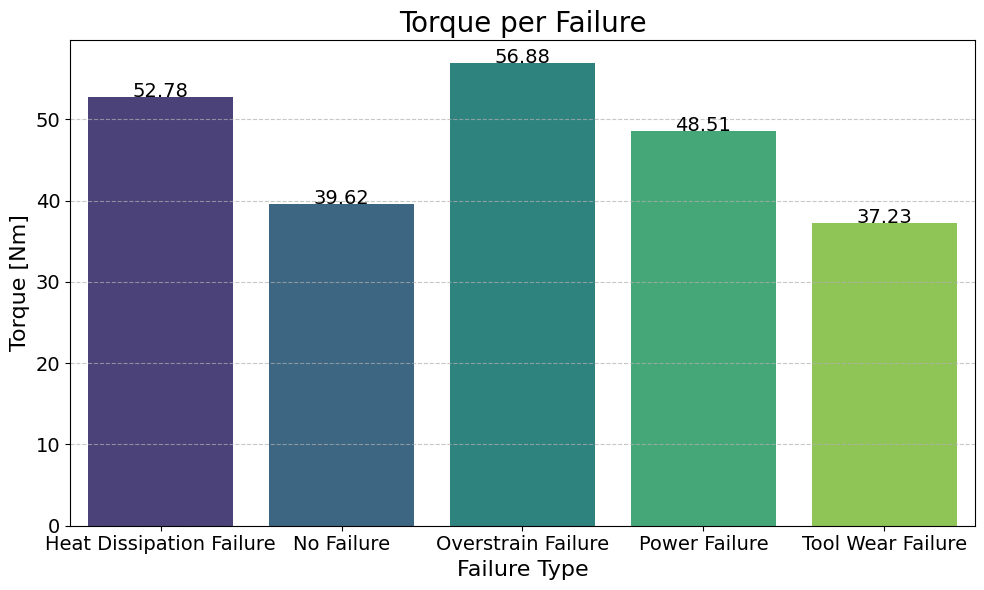

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='failure_type', y='torque_avg', palette='viridis')

for index, row in summary.iterrows():
    plt.text(index, row['torque_avg'], round(row['torque_avg'], 2), color='black', ha="center", size=14)

plt.title('Torque per Failure', fontsize=20, ha='center')
plt.ylabel('Torque [Nm]', fontsize=16)
plt.xlabel('Failure Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

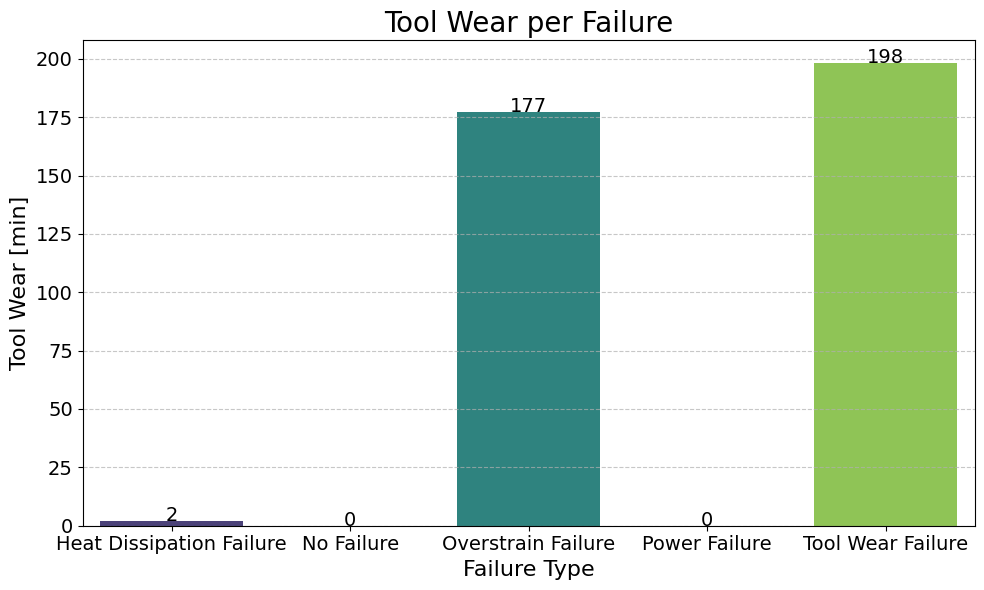

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='failure_type', y='tool_wear_min_avg', palette='viridis')

for index, row in summary.iterrows():
    plt.text(index, row['tool_wear_min_avg'], round(row['tool_wear_min_avg'], 2), color='black', ha="center", size=14)

plt.title('Tool Wear per Failure', fontsize=20, ha='center')
plt.ylabel('Tool Wear [min]', fontsize=16)
plt.xlabel('Failure Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

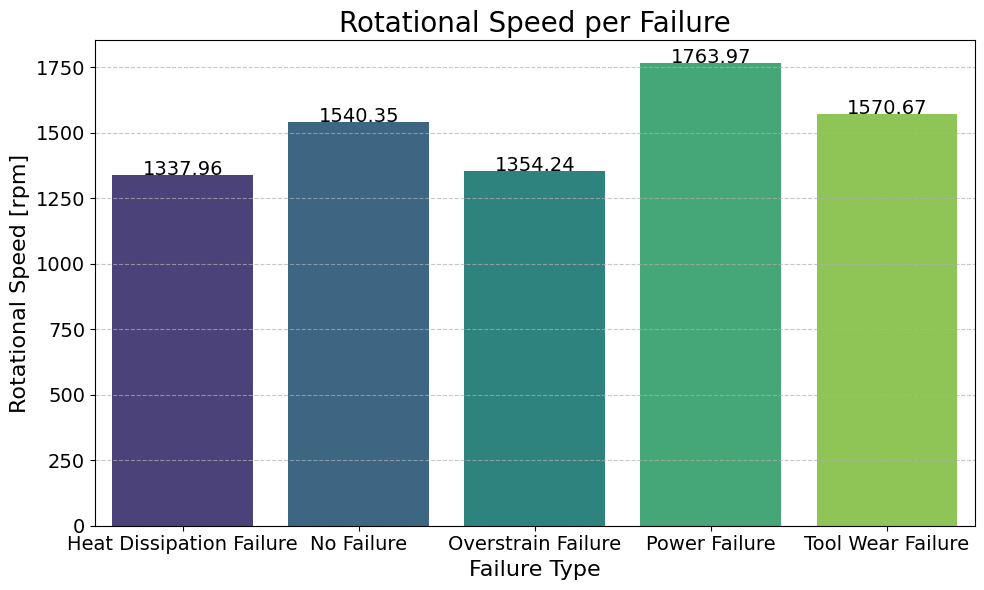

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='failure_type', y='Rotational speed [rpm]', palette='viridis')

for index, row in summary.iterrows():
    plt.text(index, row['Rotational speed [rpm]'], round(row['Rotational speed [rpm]'], 2), color='black', ha="center", size=14)

plt.title('Rotational Speed per Failure', fontsize=20, ha='center')
plt.ylabel('Rotational Speed [rpm]', fontsize=16)
plt.xlabel('Failure Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

CORRELATION

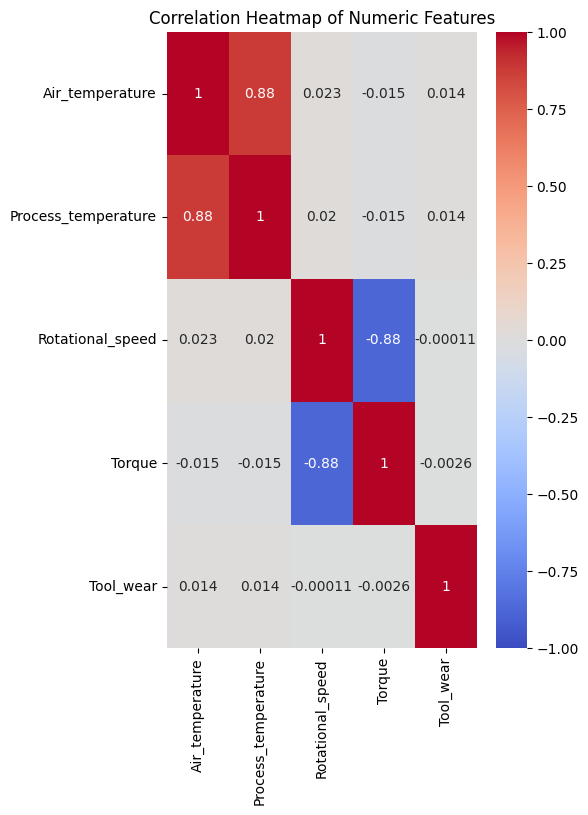

In [ ]:
numeric_df = df[NUMERIC_FEATURES]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(5, 8))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Heatmap of Numeric Features')
plt.show()



There is a strong positive correlation (0.88) between Air Temperature and Process Temperature. This indicates that as the air temperature increases, the process temperature tends to increase as well.

There is a strong negative correlation (-0.88) between Rotational Speed and Torque.

Most other feature pairs show very weak or negligible correlations, with values close to zero, indicating that changes in one variable have little to no linear relationship with changes in the other.

#Scaling Numeric features and applying OneHotEncoder for categoric features

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
# Creating preprocessor ColumnTransformer to do OneHotEncoder for CATEGORIC_FEATURES and StandardScaler() for NUMERIC_FEATURES

# Defining the pipelines for numeric and categorical transformations

num_pipeline = Pipeline([
    ('num_features', StandardScaler())
])
cat_pipeline = Pipeline([
    ('cat_features', OneHotEncoder())
])

# Creating the ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num_trans', num_pipeline, NUMERIC_FEATURES),
    ('cat_trans', cat_pipeline, CATEGORIC_FEATURES)
])

# Fit and transform the data
df_transformed = preprocessor.fit_transform(df)


# The transformed data will have new column names, especially for the one hot encoded categories

encoded_feature_names = preprocessor.named_transformers_['cat_trans'].get_feature_names_out(CATEGORIC_FEATURES)
new_column_names = list(NUMERIC_FEATURES) + list(encoded_feature_names)
df_transformed = pd.DataFrame(df_transformed, columns=new_column_names)
df_transformed.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Type_High,Type_Low,Type_Medium
0,-0.951417,-0.946356,0.067484,0.283054,-1.695647,0.0,0.0,1.0
1,-0.901428,-0.878954,-0.729604,0.634238,-1.648511,0.0,1.0,0.0
2,-0.951417,-1.013759,-0.227940,0.945286,-1.617087,0.0,1.0,0.0
3,-0.901428,-0.946356,-0.590253,-0.048061,-1.585664,0.0,1.0,0.0
4,-0.901428,-0.878954,-0.729604,0.002108,-1.554240,0.0,1.0,0.0


#MODELING

In [ ]:
from imblearn.over_sampling import SMOTENC
from sklearn.utils import class_weight
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

Defining the Metrics

In [ ]:
def get_metrics(y_true, y_pred):

    f1_scores_per_class = f1_score(y_true, y_pred, average=None)

    dict_metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        'Macro Recall': recall_score(y_true, y_pred, average='macro'),
        'Macro Precision': precision_score(y_true, y_pred, average='macro'),
        'Macro F1': f1_score(y_true, y_pred, average='macro'),
        'F1 Scores per Class': f1_scores_per_class
    }
    return dict_metrics

Train Test Splitting

In [ ]:
df_model = df.copy()
X = df_model[NUMERIC_FEATURES + CATEGORIC_FEATURES]
y = df_model['Failure_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

Using class Weight

In [ ]:
CW = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=2023))
])
# Fitting pipeline with sample weights
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
CW.fit(X_train, y_train, model__sample_weight=weights)

y_pred =CW.predict(X_test)
metrics = get_metrics(y_test, y_pred)
metrics

{'Accuracy': 0.9543859649122807,
 'Balanced Accuracy': 0.8088413913217465,
 'Macro Recall': 0.8088413913217465,
 'Macro Precision': 0.5805520745597669,
 'Macro F1': 0.6480662154359346,
 'F1 Scores per Class': array([0.78571429, 0.9762533 , 0.53658537, 0.7804878 , 0.16129032])}

Using SMOTE-NC

In [ ]:

categorical_features_indices = [i for i, feature in enumerate(NUMERIC_FEATURES + CATEGORIC_FEATURES)
                                if feature in CATEGORIC_FEATURES]

# Creating the new pipeline with SMOTENC using ImbPipeline
pip_model_smotenc = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smotenc', SMOTENC(categorical_features=categorical_features_indices, random_state=42)),
    ('model', GradientBoostingClassifier(random_state=2023))
])
# Fit the pipeline
pip_model_smotenc.fit(X_train, y_train)
y_pred = pip_model_smotenc.predict(X_test)
metrics = get_metrics(y_test, y_pred)
metrics

{'Accuracy': 0.9453634085213033,
 'Balanced Accuracy': 0.8441640973870653,
 'Macro Recall': 0.8441640973870653,
 'Macro Precision': 0.5652665808354431,
 'Macro F1': 0.6459840893394302,
 'F1 Scores per Class': array([0.8       , 0.97132236, 0.63636364, 0.69565217, 0.12658228])}

no failure class dominates the dataset, the comparison between two models using different approaches for handling class imbalance reveals interesting insights.

The first Technique, employing class weights, achieves a slightly higher Macro F1 score of 64.80% compared to the SMOTE-NC 64.59%, which utilizes the SMOTENC method.

This indicates that using class weights is a more effective approach in this scenario. Class weights enable the model to assign higher importance to minority classes, aiding in better learning and potentially leading to a more balanced and accurate prediction model.

#GRIDSEARCH CV

In [ ]:

CW = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=2023))
])


weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
CW.fit(X_train, y_train, model__sample_weight=weights)


params = {
    'model': [

        LogisticRegressionCV(max_iter=500, random_state=2023),
        RandomForestClassifier(random_state=2023),
        GradientBoostingClassifier(random_state=2023),

    ],
}

grid = GridSearchCV(CW, params, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

results = pd.DataFrame(grid.cv_results_)
best_model_index = results['mean_test_score'].idxmax()
best_model_params = results.loc[best_model_index, 'params']


print("Best model:")
print(best_model_params)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best model:
{'model': GradientBoostingClassifier(random_state=2023)}


As we can see, GradientBoostingClassifier is the best model to our application in comparation with RandomForestClassifier, GradientBoostingClassifier and LogisticRegression.

#Tuning the Model

In [ ]:
# New parameters for fine-tuning the RandomForestClassifier
fine_tune_params = {

    'model__n_estimators': [50, 100, 200, 300, 400, 500],
    'model__max_depth': [None, 5, 10, 15, 20]
}

# Running a new GridSearchCV for fine-tuning
fine_tune_grid = GridSearchCV(CW, fine_tune_params, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
fine_tune_grid.fit(X_train, y_train)


fine_tuned_results = pd.DataFrame(fine_tune_grid.cv_results_)
fine_tuned_best_index = fine_tuned_results['mean_test_score'].idxmax()
fine_tuned_best_params = fine_tuned_results.loc[fine_tuned_best_index, 'params']


print("Best fine-tuned model parameters:")
print(fine_tuned_best_params)


tuned_model = fine_tune_grid.best_estimator_
y_pred = tuned_model.predict(X_test)


get_metrics(y_test, y_pred)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best fine-tuned model parameters:
{'model__max_depth': 5, 'model__n_estimators': 300}


{'Accuracy': 0.9839598997493735,
 'Balanced Accuracy': 0.6511761120247247,
 'Macro Recall': 0.6511761120247247,
 'Macro Precision': 0.679433844909891,
 'Macro F1': 0.6631151599181024,
 'F1 Scores per Class': array([0.86956522, 0.99198759, 0.62068966, 0.83333333, 0.        ])}

 GridSearchCV detected that with this parameter adjusted to 5 and 300 respectively the model perfomance is better.

As we can observe Macro F1 received a little perfomance and the balance of recall and precision is biggest. As mentioned before, our target score is Macro F1 with atention in precision, so in this scenario we have a best model for our application with the approach applied.

#CONFUSION MATRIX

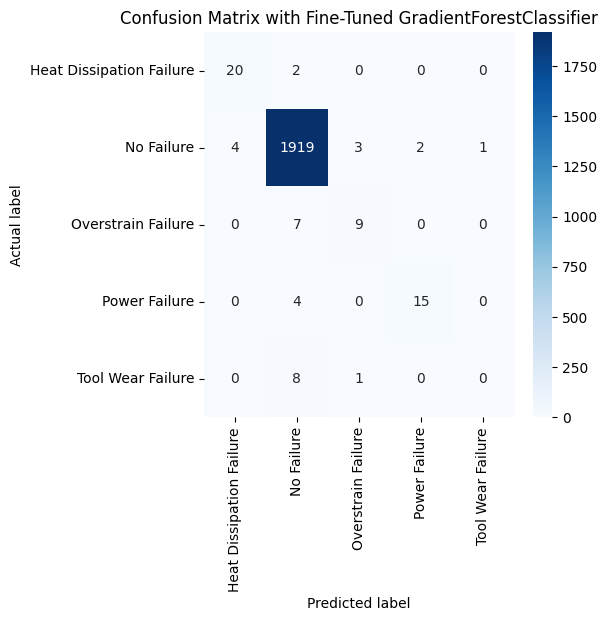

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_pred))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix with Fine-Tuned GradientForestClassifier')
plt.show()

Each cell in the matrix represents the number of instances where a particular actual label row was predicted as a specific predicted label column.

Heat Dissipation Failure:
Correctly predicted as "Heat Dissipation Failure" 19 times.
Incorrectly predicted as "No Failure" 3 times.

No Failure:
Correctly predicted as "No Failure" 1926 times.
Incorrectly predicted as "Overstrain Failure" 2 times.
Incorrectly predicted as "Tool Wear Failure" 3 times.

Overstrain Failure:
Correctly predicted as "Overstrain Failure" 12 times.
Incorrectly predicted as "No Failure" 4 times.

Power Failure:
Correctly predicted as "Power Failure" 17 times.
Incorrectly predicted as "No Failure" 2 times.

Tool Wear Failure:
Incorrectly predicted as "No Failure" 7 times.
Incorrectly predicted as "Overstrain Failure" 2 times.


The classifier performs very well in predicting "No Failure" with 1926 correct predictions out of 1931 instances.

The model also performs well for "Power Failure" with 17 correct predictions out of 19 instances.

The predictions for "Heat Dissipation Failure," "Overstrain Failure," and "Tool Wear Failure" have more misclassifications, indicating these categories might need more data or tuning for better accuracy.

In [ ]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(tuned_model, file)
